In [71]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [72]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [73]:
X_train.shape

(60000, 28, 28)

In [74]:
## X_train is a 3D array
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [75]:
## first image in X_train is " X_train[0] "
X_train[0].shape

(28, 28)

In [76]:
X_test.shape

(10000, 28, 28)

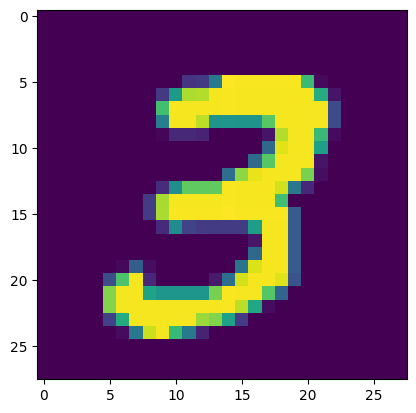

In [77]:
## Here we can easily draw images by simple matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [78]:
## Data preprocessing
X_train = X_train/255
y_test = y_test/255

## As we know here data is in the form of piceles 28*28, we have to flat this layer to 784 picele array for this in keras there is a layer named as Flatten layer

In [79]:
# three convolution layer
# first layer have 784 filters/nodes
# second layer have 128 filters/nodes
# third layer have 10 filters/nodes

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
## in Flatten we have to espesify size of input only
## FLatten convert our data into 1D or 784 datas simple

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
## whenever output layer contaian more then one node make sure your 
## activation function must be softmax 
model.add(Dense(10,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


## 784*128 + 128 = 100480
## 128*10 + 10 =  1290         

In [81]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [82]:
history = model.fit(X_train,y_train,epochs=25,validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 5ms/step - loss: 0.2855 - accuracy: 0.9164 - val_loss: 0.1427 - val_accuracy: 0.9587
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1216 - accuracy: 0.9635 - val_loss: 0.1018 - val_accuracy: 0.9713
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0820 - accuracy: 0.9755 - val_loss: 0.0927 - val_accuracy: 0.9740
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0605 - accuracy: 0.9807 - val_loss: 0.0935 - val_accuracy: 0.9746
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0480 - accuracy: 0.9843 - val_loss: 0.1034 - val_accuracy: 0.9706
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0391 - accuracy: 0.9870 - val_loss: 0.0948 - val_accuracy: 0.9746
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.0973 - val_accuracy

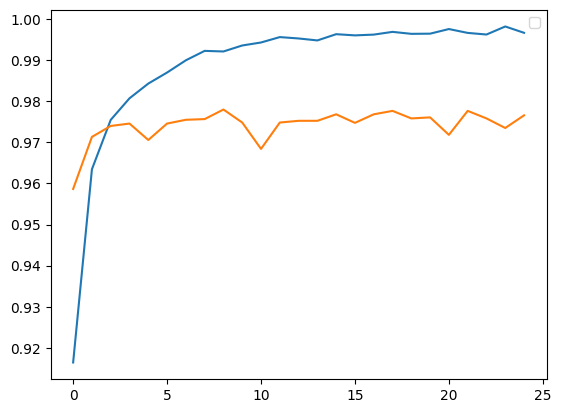

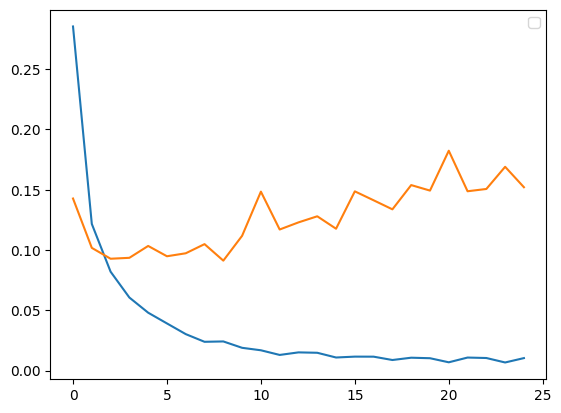

In [83]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

In [84]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [85]:
y_pred = y_pred.argmax(axis=1)

In [87]:
from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred)

In [88]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([7])

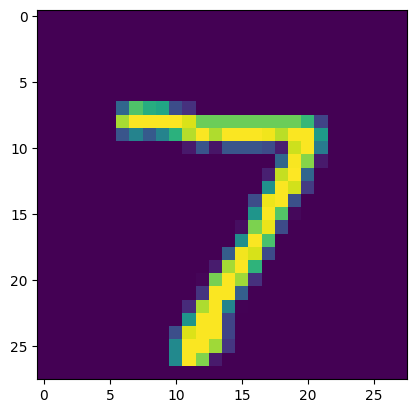

In [89]:
plt.imshow(X_test[0])